In [1]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d alessiocorrado99/animals10

 97% 569M/586M [00:05<00:00, 59.2MB/s]
100% 586M/586M [00:05<00:00, 106MB/s] 


In [ ]:
! mkdir animals

In [ ]:
! unzip animals10.zip -d animals

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: animals/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: animals/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: animals/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: animals/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: animals/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: animals/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: animals/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: animals/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: animals/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: animals/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: animals/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: animals/raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: animals/raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO

In [3]:
translate = { "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "cane": "dog",  "elefante" : "elephant", "farfalla": "butterfly", "gallina": "chicken",  "ragno": "spider"}

In [4]:
data_dir = "animals/raw-img/"

In [5]:
translate.keys()

dict_keys(['cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'scoiattolo', 'cane', 'ragno'])

In [6]:
import os 

for it, eng in translate.items():

  old_name = data_dir + it
  new_name = data_dir + eng

  os.rename(old_name, new_name)

  #It raised a error since I have already run this code.

FileNotFoundError: ignored

In [7]:
!ls animals/raw-img/

butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [8]:
class_names = "butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel".split()

In [9]:
class_names

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(validation_split = 0.2, rescale = 1./255)

In [12]:
batch_size = 32
image_size = (224,224)

train_data = datagen.flow_from_directory(data_dir,
                                         batch_size = batch_size,
                                         target_size = image_size,
                                         class_mode = "categorical",
                                         subset = "training")

val_data = datagen.flow_from_directory(data_dir,
                                        batch_size = batch_size,
                                        target_size = image_size,
                                        class_mode = "categorical",
                                        subset = "validation")

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [14]:
vgg_base_model = tf.keras.applications.VGG19(include_top = False,
                                             weights = "imagenet")

In [15]:
input_shape = image_size + (3,)

In [16]:
vgg_base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [17]:
input_shape

(224, 224, 3)

In [18]:
def my_vgg19_model_gen(input_shape, base_model):

  inputs = tf.keras.Input(shape = input_shape)

  base_model.trainable = False

  x = base_model(inputs, training = False)

  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(units=128, activation = "relu")(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  outputs = tf.keras.layers.Dense(units = 10, activation = "softmax")(x)

  model = tf.keras.Model(inputs, outputs)

  return model

In [19]:
vgg19_model_1 = my_vgg19_model_gen(input_shape, vgg_base_model)

In [20]:
vgg19_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
                      loss = "CategoricalCrossentropy",
                      metrics = ["accuracy"])

In [21]:
history_1 = vgg19_model_1.fit(train_data, validation_data = val_data, epochs = 10)

Epoch 1/10
 21/655 [..............................] - ETA: 4:44 - loss: 7.8649 - accuracy: 0.2246

KeyboardInterrupt: ignored

In [ ]:
## Ok it did not go so well, i will try another approach.

In [22]:
vgg16_base_model = tf.keras.applications.VGG16(include_top = False,
                                               weights = "imagenet")

In [23]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
def my_vgg16_model_gen(input_shape, base_model):

  inputs = tf.keras.Input(shape = input_shape)

  base_model.trainable = False

  x = base_model(inputs, training = False)

  x = tf.keras.layers.Flatten()(x)

  outputs = tf.keras.layers.Dense(units = 10, activation = "softmax")(x)

  model = tf.keras.Model(inputs, outputs)

  return model

In [25]:
vgg16_model = my_vgg16_model_gen(input_shape, vgg16_base_model)

In [26]:
vgg16_model.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = "categorical_crossentropy",
                    metrics = ["accuracy"])

In [28]:
history2 = vgg16_model.fit(train_data, validation_data = val_data, epochs = 2)

Epoch 1/2
655/655 [==============================] - 240s 365ms/step - loss: 0.7367 - accuracy: 0.7685 - val_loss: 0.5341 - val_accuracy: 0.8330
Epoch 2/2
655/655 [==============================] - 234s 358ms/step - loss: 0.3186 - accuracy: 0.8968 - val_loss: 0.5456 - val_accuracy: 0.8438


In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

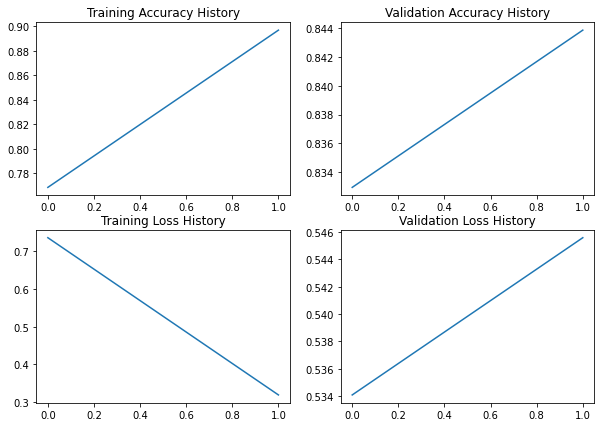

In [30]:
fig, axs = plt.subplots(2,2, figsize = (10, 7))

axs[0,0].plot(history2.history["accuracy"])
axs[0,0].set_title("Training Accuracy History")

axs[0,1].plot(history2.history["val_accuracy"])
axs[0,1].set_title("Validation Accuracy History")

axs[1,0].plot(history2.history["loss"])
axs[1,0].set_title("Training Loss History")

axs[1,1].plot(history2.history["val_loss"])
axs[1,1].set_title("Validation Loss History");

# It made a sense when I deployed the model with 10 epochs, but now I run with only 2.

In [31]:
preds = vgg16_model.predict(val_data)

In [32]:
preds.shape

(5232, 10)

In [33]:
preds_new = []

for pred in preds:

  pred_ind = tf.math.argmax(pred)
  pred_prob = max(pred)
  pred_class = class_names[pred_ind]

  preds_new.append([pred_ind, pred_prob, pred_class])

In [150]:
preds_new

[[<tf.Tensor: shape=(), dtype=int64, numpy=9>, 0.5508378, 'squirrel'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=8>, 0.9998429, 'spider'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=6>, 0.98392534, 'horse'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=6>, 0.999627, 'horse'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=8>, 0.9999907, 'spider'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=9>, 0.5375212, 'squirrel'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=4>, 0.71090454, 'dog'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=5>, 0.85558176, 'elephant'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=0>, 0.98728883, 'butterfly'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=4>, 0.9999777, 'dog'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=9>, 0.9998307, 'squirrel'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=2>, 0.82586753, 'chicken'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=8>, 0.6169335, 'spider'],
 [<tf.Tensor: shape=(), dtype=int64, numpy=6>, 0.99999905, 'horse'],
 [<tf.Tensor: shape=(), dt

In [117]:
import random
import cv2
import matplotlib.image as mpimg

def predict_and_show(data_dir, model, class_names):

  random_class = random.choice(class_names)

  target_dir = data_dir + random_class

  random_img_name = random.choice(os.listdir(target_dir))

  img_p = cv2.imread(target_dir + "/" + random_img_name)
  img_m = cv2.resize(img_p, dsize = (224,224))
  img = img_m / 255
  res = tf.reshape(img, (1,224,224,3)) 

  predicted = model.predict(res)
  pred_ind = tf.math.argmax(predicted[0])
  pred_prob = max(pred[0])
  pred_class = class_names[pred_ind]
  pred_result = [pred_ind, pred_prob, pred_class]

  if pred_class == random_class:
    plt.imshow(img)
    plt.title("True Prediction, Label:" + random_class)

  else:
    plt.imshow(img)
    plt.title("Pred: {}, Label: {}".format(pred_class, random_class))
  
  return img


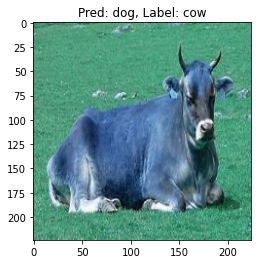

In [128]:
img = predict_and_show(data_dir, vgg16_model, class_names)